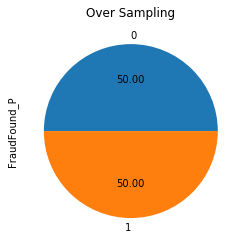

In [19]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler

dataset = pd.read_csv("fraud_oracle.csv")

#removing unrelated variables from the data set
updated_ds = dataset.drop(["Month","WeekOfMonth","DayOfWeek", "Make", "DayOfWeekClaimed", "MonthClaimed", "WeekOfMonthClaimed", 
                   "RepNumber", "Deductible", "AgeOfPolicyHolder","PastNumberOfClaims","PolicyNumber", "AddressChange_Claim","NumberOfCars","Year"],axis =1)

#drop fetures that identified as unimportant by feature extraction method using R-Studio

updated_ds_new = updated_ds.drop(["AccidentArea", "AgentType", "DriverRating", "NumberOfSuppliments","PoliceReportFiled","VehiclePrice"],axis =1)


# For Days_Policy_Accident it contains range of values here change this column into get the mean of the range.

updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == 'more than 30', 'Days_Policy_Accident'] = '31'

updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == 'none', 'Days_Policy_Accident'] = '0'

# mean of range 8 t0 15 -> 8+9+10+11+12+13+14+15 / 8 = 11.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == '8 to 15', 'Days_Policy_Accident'] = '11.5'

# mean of range 15 to 30 ->  15+16+17+18+19+20+21+22+23+24+25+26+27+28+29+30/ 16 = 22.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == '15 to 30', 'Days_Policy_Accident'] = '22.5'

# mean of range 1 t0 7 ->  1+2+3+4+5+6+7/7 = 4 
updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == '1 to 7', 'Days_Policy_Accident'] = '4'


# For Days_Policy_Claim it contains range of values here change this column into get the mean of the range.

updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == 'more than 30', 'Days_Policy_Claim'] = '31'

# mean of range 15 to 30 ->  15+16+17+18+19+20+21+22+23+24+25+26+27+28+29+30/ 16 = 22.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == '15 to 30', 'Days_Policy_Claim'] = '22.5'

# mean of range 8 t0 15 -> 8+9+10+11+12+13+14+15 / 8 = 11.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == '8 to 15', 'Days_Policy_Claim'] = '11.5'

updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == 'none', 'Days_Policy_Claim'] = '0'

# For AgeOfVehicle it contains range of values here change this column into get the mean of the range.

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '7 years', 'AgeOfVehicle'] = '7'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == 'more than 7', 'AgeOfVehicle'] = '8'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '6 years', 'AgeOfVehicle'] = '6'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '5 years', 'AgeOfVehicle'] = '5'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == 'new', 'AgeOfVehicle'] = '0'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '4 years', 'AgeOfVehicle'] = '4'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '3 years', 'AgeOfVehicle'] = '3'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '2 years', 'AgeOfVehicle'] = '2'

# changing datatypes of the dataset as per the above transformations
updated_ds_new['Days_Policy_Accident'] = updated_ds_new['Days_Policy_Accident'].astype('float')
updated_ds_new['Days_Policy_Claim'] = updated_ds_new['Days_Policy_Claim'].astype('float')
updated_ds_new['AgeOfVehicle'] = updated_ds_new['AgeOfVehicle'].astype('float')

updated_ds_new.dtypes

# perform OHE for categorical data 
one_hot_encoded_data = pd.get_dummies(updated_ds_new, columns = ['Sex', 'MaritalStatus','Fault','PolicyType', 'VehicleCategory','WitnessPresent','BasePolicy'])


x = one_hot_encoded_data.drop("FraudFound_P", axis=1)
y = one_hot_encoded_data["FraudFound_P"]


ros = RandomOverSampler(sampling_strategy = "not majority")
x_res, y_res = ros.fit_resample(x,y)

ax = y_res.value_counts().plot.pie(autopct = '%.2f')
_=ax.set_title("Over Sampling")



classes are:  ['0', '1']
Accuracy: 0.7556040924244166
Confusion Matrix is 
[[2595 1733]
 [ 393 3978]]


              precision    recall  f1-score   support

           0       0.87      0.60      0.71      4328
           1       0.70      0.91      0.79      4371

    accuracy                           0.76      8699
   macro avg       0.78      0.75      0.75      8699
weighted avg       0.78      0.76      0.75      8699



Confusion matrix, without normalization
[[2595 1733]
 [ 393 3978]]


C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


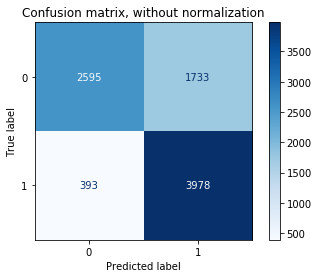

In [18]:
# Applying Gradient Boost for Predict Frauds in Vehicle Insurance Claim
# https://www.analyticssteps.com/blogs/implementing-gradient-boosting-algorithm-using-python
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix



class_names = ["0", "1"]
print("classes are: ", class_names)

test_size = 0.30 # taking 70:30 training and test set

seed = 7  # Random number seeding for reapeatability of the code

X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=test_size, random_state=seed)

gradient_booster = GradientBoostingClassifier(learning_rate=0.1)

gradient_booster.fit(X_train,y_train)

y_pred = gradient_booster.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

print("Confusion Matrix is ")
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))
print("\n")


# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gradient_booster, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


classes are:  ['0', '1']
Accuracy: 0.7768709047016898
Confusion Matrix is 
[[2764 1564]
 [ 377 3994]]


              precision    recall  f1-score   support

           0       0.88      0.64      0.74      4328
           1       0.72      0.91      0.80      4371

    accuracy                           0.78      8699
   macro avg       0.80      0.78      0.77      8699
weighted avg       0.80      0.78      0.77      8699



Confusion matrix, without normalization
[[2764 1564]
 [ 377 3994]]


C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


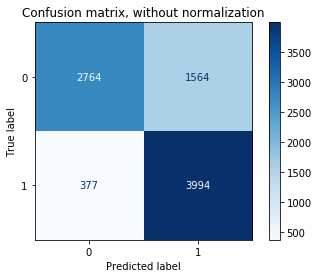

In [20]:
# Applying Gradient Boost for Predict Frauds in Vehicle Insurance Claim
# https://www.analyticssteps.com/blogs/implementing-gradient-boosting-algorithm-using-python
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix



class_names = ["0", "1"]
print("classes are: ", class_names)

test_size = 0.30 # taking 70:30 training and test set

seed = 7  # Random number seeding for reapeatability of the code

X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=test_size, random_state=seed)

gradient_booster = GradientBoostingClassifier(learning_rate=0.3)

gradient_booster.fit(X_train,y_train)

y_pred = gradient_booster.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

print("Confusion Matrix is ")
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))
print("\n")


# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gradient_booster, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


classes are:  ['0', '1']
Accuracy: 0.788251523163582
Confusion Matrix is 
[[2876 1452]
 [ 390 3981]]


              precision    recall  f1-score   support

           0       0.88      0.66      0.76      4328
           1       0.73      0.91      0.81      4371

    accuracy                           0.79      8699
   macro avg       0.81      0.79      0.78      8699
weighted avg       0.81      0.79      0.78      8699



Confusion matrix, without normalization
[[2876 1452]
 [ 390 3981]]


C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


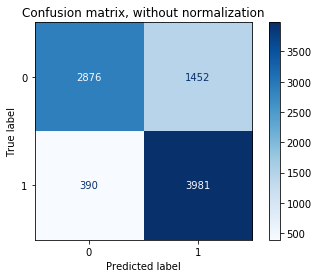

In [12]:
# Applying Gradient Boost for Predict Frauds in Vehicle Insurance Claim
# https://www.analyticssteps.com/blogs/implementing-gradient-boosting-algorithm-using-python
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix



class_names = ["0", "1"]
print("classes are: ", class_names)

test_size = 0.30 # taking 70:30 training and test set

seed = 7  # Random number seeding for reapeatability of the code

X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=test_size, random_state=seed)

gradient_booster = GradientBoostingClassifier(learning_rate=0.5)

gradient_booster.fit(X_train,y_train)

y_pred = gradient_booster.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

print("Confusion Matrix is ")
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))
print("\n")


# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gradient_booster, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


classes are:  ['0', '1']
Accuracy: 0.7892861248419358
Confusion Matrix is 
[[2926 1402]
 [ 431 3940]]


              precision    recall  f1-score   support

           0       0.87      0.68      0.76      4328
           1       0.74      0.90      0.81      4371

    accuracy                           0.79      8699
   macro avg       0.80      0.79      0.79      8699
weighted avg       0.80      0.79      0.79      8699



Confusion matrix, without normalization
[[2926 1402]
 [ 431 3940]]


C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


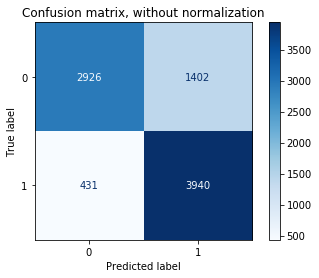

In [10]:
# Applying Gradient Boost for Predict Frauds in Vehicle Insurance Claim
# https://www.analyticssteps.com/blogs/implementing-gradient-boosting-algorithm-using-python
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix



class_names = ["0", "1"]
print("classes are: ", class_names)

test_size = 0.30 # taking 70:30 training and test set

seed = 7  # Random number seeding for reapeatability of the code

X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=test_size, random_state=seed)

gradient_booster = GradientBoostingClassifier(learning_rate=0.7)

gradient_booster.fit(X_train,y_train)

y_pred = gradient_booster.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

print("Confusion Matrix is ")
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))
print("\n")


# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gradient_booster, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


classes are:  ['0', '1']
Accuracy: 0.7898609035521325
Confusion Matrix is 
[[2979 1349]
 [ 479 3892]]


              precision    recall  f1-score   support

           0       0.86      0.69      0.77      4328
           1       0.74      0.89      0.81      4371

    accuracy                           0.79      8699
   macro avg       0.80      0.79      0.79      8699
weighted avg       0.80      0.79      0.79      8699



Confusion matrix, without normalization
[[2979 1349]
 [ 479 3892]]


C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


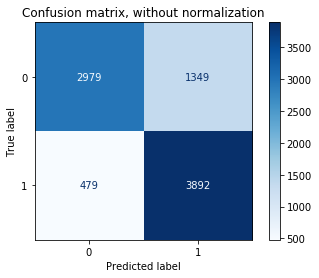

In [8]:
# Applying Gradient Boost for Predict Frauds in Vehicle Insurance Claim
# https://www.analyticssteps.com/blogs/implementing-gradient-boosting-algorithm-using-python
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix



class_names = ["0", "1"]
print("classes are: ", class_names)

test_size = 0.30 # taking 70:30 training and test set

seed = 7  # Random number seeding for reapeatability of the code

X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=test_size, random_state=seed)

gradient_booster = GradientBoostingClassifier(learning_rate=0.9)

gradient_booster.fit(X_train,y_train)

y_pred = gradient_booster.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

print("Confusion Matrix is ")
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))
print("\n")


# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gradient_booster, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
